In [86]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import pymannkendall as mk


In [87]:
#Read Data
temp_data = pd.read_csv('../data/processed/mean_historical_temp_clean.csv')

#Turn temp_data into a DataFrame

temp_data = pd.DataFrame(temp_data)

#Display first few rows of the dataset
temp_data.head()


,code,name,date,temp_mean,temp_outlier
0,MWI,Malawi,1950-07-01,22.20,False
1,MWI,Malawi,1951-07-01,21.43,False
2,MWI,Malawi,1952-07-01,21.66,False
3,MWI,Malawi,1953-07-01,21.33,False
4,MWI,Malawi,1954-07-01,21.64,False


In [88]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   code          65 non-null     object 
 1   name          65 non-null     object 
 2   date          65 non-null     object 
 3   temp_mean     65 non-null     float64
 4   temp_outlier  65 non-null     bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 2.2+ KB


In [89]:
# Extract Only Year and Temperature Columns
temp_data_new = temp_data[['date', 'temp_mean']]

# Convert 'date' column to datetime format and only keep the year
temp_data_new = temp_data_new.copy()  # 👈 Add this line first
temp_data_new['date'] = pd.to_datetime(temp_data_new['date'])
temp_data_new['year'] = temp_data_new['date'].dt.year
temp_data_new = temp_data_new[['year', 'temp_mean']]
temp_data_new.head()

,year,temp_mean
0,1950,22.20
1,1951,21.43
2,1952,21.66
3,1953,21.33
4,1954,21.64


In [90]:
#Set index column to start from 1 and rename columns
temp_data_new.index = np.arange(1, len(temp_data_new) + 1)
temp_data_new.rename(columns={'temp_mean': 'Mean_Temperature'}, inplace=True)
temp_data_new.rename(columns={'year': 'Year'}, inplace=True)
temp_data_new.head()

,Year,Mean_Temperature
1,1950,22.20
2,1951,21.43
3,1952,21.66
4,1953,21.33
5,1954,21.64


<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 1 to 65
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              65 non-null     int32  
 1   Mean_Temperature  65 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.0 KB


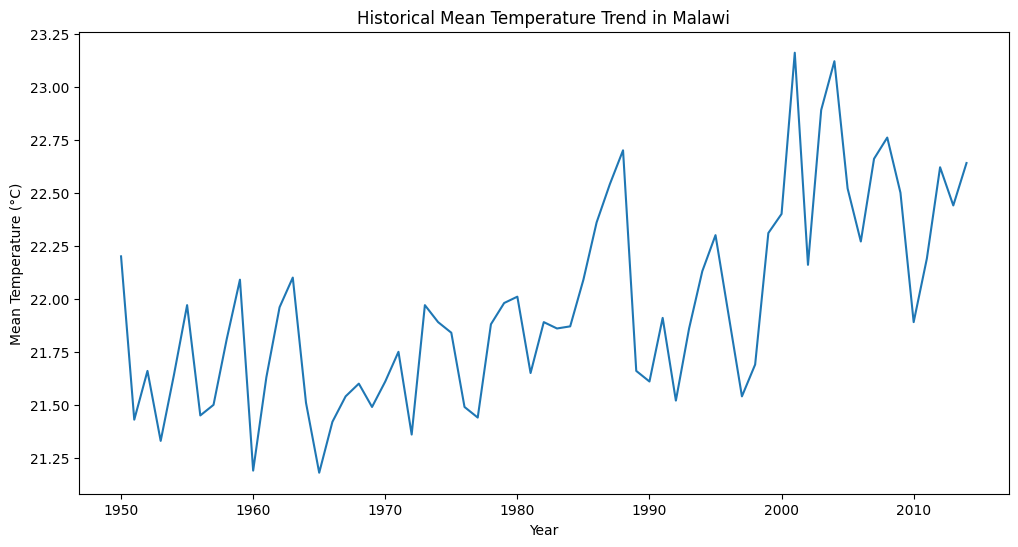

In [ ]:
# Begin Trend Analysis
temp_data_new.info()
temp_data_new.describe()
plt.figure(figsize=(12, 6))
sns.lineplot(data=temp_data_new, x='Year', y='Mean_Temperature')
plt.title('Historical Mean Temperature Trend in Malawi (1950-2014)')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.show()


                            OLS Regression Results                            
Dep. Variable:       Mean_Temperature   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     48.81
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           2.11e-09
Time:                        05:20:11   Log-Likelihood:                -23.347
No. Observations:                  65   AIC:                             50.69
Df Residuals:                      63   BIC:                             55.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.2625      4.612     -2.225      0.0

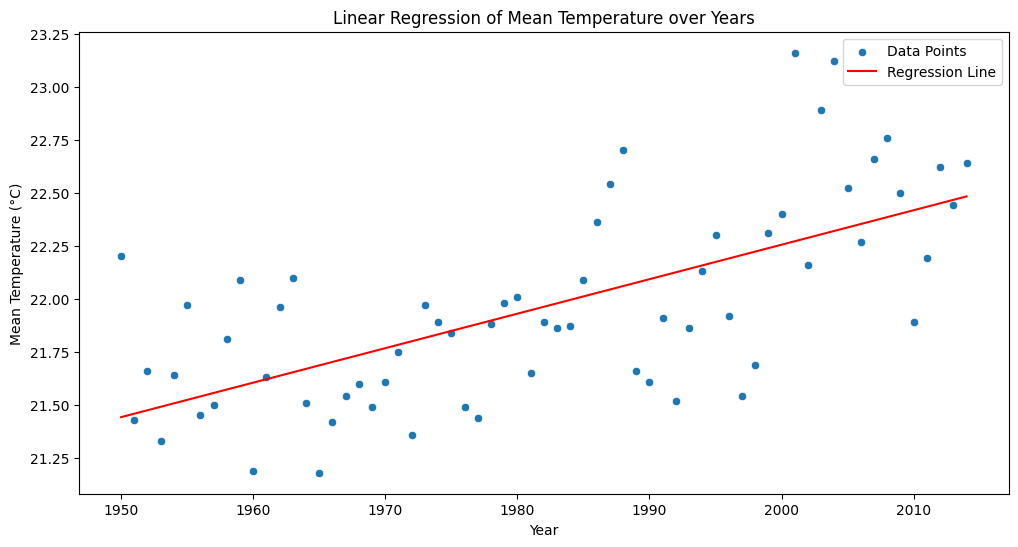

In [92]:
# Linear Regression Analysis
X = sm.add_constant(temp_data_new['Year'])  # adding a constant
model = sm.OLS(temp_data_new['Mean_Temperature'], X).fit()
predictions = model.predict(X)
print(model.summary())
# Plotting the regression line
plt.figure(figsize=(12, 6))
sns.scatterplot(data=temp_data_new, x='Year', y='Mean_Temperature', label='Data Points')
plt.plot(temp_data_new['Year'], predictions, color='red', label='Regression Line')
plt.title('Linear Regression of Mean Temperature over Years')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()


In [96]:
# Mann-Kendall Trend Test
mk_result = mk.original_test(temp_data_new['Mean_Temperature'])
print(mk_result)


Mann_Kendall_Test(trend='increasing', h=True, p=3.374705648262477e-08, z=5.520794347658511, Tau=0.46923076923076923, s=976.0, var_s=31189.333333333332, slope=0.01652173913043474, intercept=21.36130434782609)


    Year  Predicted_Mean_Temperature
0   2015                   22.498846
1   2016                   22.515105
2   2017                   22.531364
3   2018                   22.547622
4   2019                   22.563881
5   2020                   22.580140
6   2021                   22.596399
7   2022                   22.612657
8   2023                   22.628916
9   2024                   22.645175
10  2025                   22.661434
11  2026                   22.677692
12  2027                   22.693951
13  2028                   22.710210
14  2029                   22.726469


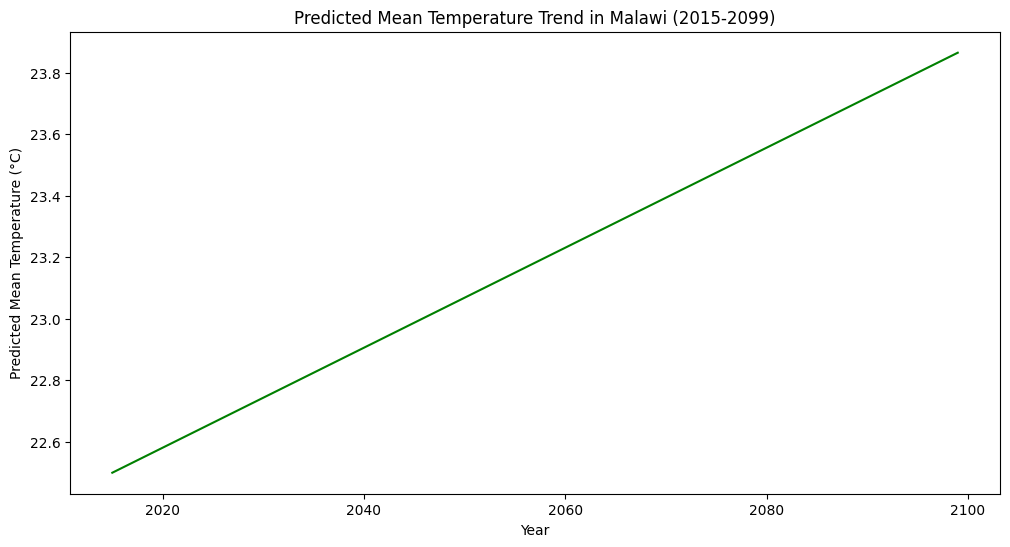

In [95]:
# Predictive Analysis from Linear Regression Model

future_years = pd.DataFrame({'Year': np.arange(2015, 2100)})
future_years = sm.add_constant(future_years)    
future_predictions = model.predict(future_years)
future_predictions_df = pd.DataFrame({'Year': future_years['Year'], 'Predicted_Mean_Temperature': future_predictions})
print(future_predictions_df.head(15))

# Plotting Future Predictions
plt.figure(figsize=(12, 6))
sns.lineplot(data=future_predictions_df, x='Year', y='Predicted_Mean_Temperature', color='green')
plt.title('Predicted Mean Temperature Trend in Malawi (2015-2099)')
plt.xlabel('Year')
plt.ylabel('Predicted Mean Temperature (°C)')
plt.show()

